In [45]:
# Dependencies
import json
import tweepy 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,date
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [22]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [27]:
# Variable for max_id
oldest_tweet = None

# Counter
counter = 1

#Todays date
today = str(date.today())


In [6]:
#Storing the twitter ID list
twitterIDList = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes" ]

In [8]:
# Get all tweets from home feed
tweetList = []

#Iterate the list of News Channel ID
for id in twitterIDList:
    counter = 1 # Set the counter to 1 for each News ID
    for x in range(1,6): #The range is used to grab the latest 100 tweets
        public_tweets = api.user_timeline(id, max_id = oldest_tweet)#API Call, to pull in the latest 20 tweets
        for tweet in public_tweets:#Loop in the 20 tweets and get set for storing it in a dictionary
            tweet_datetime = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            results = analyzer.polarity_scores(tweet["text"])
            #Add the necessarty values from the API response into a dictionary
            tweetList.append({"News Channel": id,
                              "News Time" : tweet_datetime,
                              "News text": tweet["text"],
                              "Tweet ID" : tweet["id"],
                              "Sentiment" : results["compound"],
                              "Tweet Ago": counter})
            #Make sure we set this counter, so that the next API call, picks up the next latest 20
            oldest_tweet = tweet['id'] - 1
            counter += 1 #incrementing the counter

In [10]:
#Add the dictionary to the dataframe
newsDf = pd.DataFrame(tweetList)

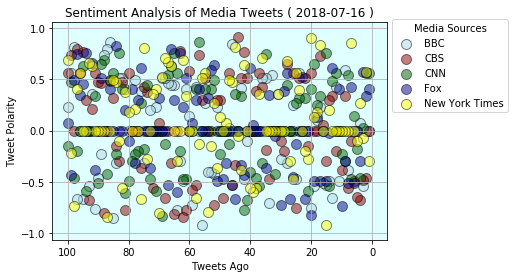

In [82]:
fig, ax = plt.subplots()

#BBC
ax.scatter(newsDf[newsDf["News Channel"] == "@BBCWorld"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@BBCWorld"]['Sentiment'],  
           c='lightblue', 
           alpha=0.50, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='BBC')

#CBS
ax.scatter(newsDf[newsDf["News Channel"] == "@CBSNews"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@CBSNews"]['Sentiment'],  
           c='darkred', 
           alpha=0.50, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CBS')

#CNN
ax.scatter(newsDf[newsDf["News Channel"] == "@CNN"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@CNN"]['Sentiment'],  
           c='darkgreen', 
           alpha=0.50, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CNN')

#CBS
ax.scatter(newsDf[newsDf["News Channel"] == "@FoxNews"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@FoxNews"]['Sentiment'],  
           c='darkblue', 
           alpha=0.50, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='Fox')

#NY Times
ax.scatter(newsDf[newsDf["News Channel"] == "@nytimes"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@nytimes"]['Sentiment'],  
           c='yellow', 
           alpha=0.50, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='New York Times')
#Setting the Title of the scatter plot
plt.title("Sentiment Analysis of Media Tweets ( " + str(today) + " )")

#Setting the X and Y axis of scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Legend
#Moving the legends outside the plot
ax.legend(title="Media Sources",loc='center left', bbox_to_anchor=(1, 0.80))

#Changing the X Axis Sort
plt.xlim([105,-5])

#Y Axis Interval
plt.yticks(np.arange(-1,1.5,0.5))

#Gridding the scatter plot
plt.grid()

ax.patch.set_facecolor("lightcyan")
